# Hands on with pandas

This notebook was written by Tim Hillel (tim.hillel@epfl.ch) for the Decision-aid methodologies in transportation course at EPFL (http://edu.epfl.ch/coursebook/en/decision-aid-methodologies-in-transportation-CIVIL-557).

Please contact before distributing or reusing the material below.

## Overview

This notebook will introduce the case-study dataset for the course, using the pandas python library.

## Pandas

Pandas is a library which replicates the dataframe functionality of R in python. 

It is a wrapper around a numpy array with a *header* for each *column* and a unique *index* for each *row*.
(The difference between a pandas `DataFrame` and a numpy `Array` is similar to the difference between a `dictionary`  and a `list`.)

If you have not used R before, you can consider pandas to be the *excel* of Python!

Let's import pandas. As with numpy, we give pandas an alias, this time `pd`

In [2]:
import pandas as pd

### Importing data

You can manually enter data in a pandas dataframe in Python, as we did with numpy in the last notebook.

However, pandas is much more useful when we import data from elsewhere! Pandas supports many file types and interfaces, including *SQL, Excel,* and *JSON*. Today however, we will be importing a *csv* file.

The data file is in the data directory. We can open it using a relative file path.

In [ ]:
import os
cwd = os.getcwd()
df = pd.read_csv(cwd + '/dataset.csv')

The dataframe has many attributes. Have a look at the shape of the dataframe, and the names of the columns. 

We can use the method `head` to look at the first 5 rows.

In [9]:
df.head()

,trip_id,household_id,person_n,trip_n,travel_mode,purpose,fueltype,faretype,bus_scale,survey_year,...,dur_pt_int_total,dur_pt_int_waiting,dur_pt_int_walking,pt_n_interchanges,dur_driving,cost_transit,cost_driving_total,cost_driving_fuel,cost_driving_con_charge,driving_traffic_percent
0,0,0,0,0,drive,HBO,Petrol_Car,full,1.0,1,...,0.0,0.0,0.0,0,0.052222,1.5,0.14,0.14,0.0,0.111702
1,1,0,0,1,drive,HBO,Petrol_Car,full,1.0,1,...,0.0,0.0,0.0,0,0.059444,1.5,0.15,0.15,0.0,0.112150
2,2,0,0,2,drive,HBO,Petrol_Car,full,1.0,1,...,0.0,0.0,0.0,0,0.236667,1.5,0.79,0.79,0.0,0.203052
3,3,0,0,3,drive,HBO,Petrol_Car,full,1.0,1,...,0.0,0.0,0.0,0,0.233333,1.5,0.78,0.78,0.0,0.160714
4,4,0,1,2,drive,HBO,Petrol_Car,dis,1.0,1,...,0.0,0.0,0.0,0,0.229167,1.5,0.78,0.78,0.0,0.130909


### Pandas series & boolean masks

Every column in the dataframe is a series. We can access the series using the column name. Remember, we use square brackets for indexing!

In [10]:
dist = df['distance']

A pandas series is a numpy vector with an index and a name. We can use many similar methods and attributes to numpy arrays. 

Try using the relevant methods to output the mean, min, and max distance. Use a format string to output them in a useful sentence.

In [15]:
dist.head()

0     778
1     778
2    4562
3    4562
4    4562
Name: distance, dtype: int64

We can also use boolean conditions on a series, e.g. dist<1000. 

Use this to select all trips in the dataset greater than 5km (5000m), and store it as a new dataframe `long_trips`

In [20]:
mask = df['distance'] > 5000
long_trips = df[mask]
long_trips.head()

,trip_id,household_id,person_n,trip_n,travel_mode,purpose,fueltype,faretype,bus_scale,survey_year,...,dur_pt_int_total,dur_pt_int_waiting,dur_pt_int_walking,pt_n_interchanges,dur_driving,cost_transit,cost_driving_total,cost_driving_fuel,cost_driving_con_charge,driving_traffic_percent
14,14,2,1,0,drive,HBO,Petrol_Car,full,1.0,1,...,0.089444,0.089444,0.000000,1,0.508333,3.0,1.59,1.59,0.0,0.356831
15,15,2,1,1,drive,NHBO,Petrol_Car,full,1.0,1,...,0.339444,0.293611,0.045833,2,0.448056,4.5,1.48,1.48,0.0,0.340360
27,27,7,1,0,drive,B,Diesel_Car,full,1.0,1,...,0.100000,0.100000,0.000000,1,0.340833,1.5,2.04,2.04,0.0,0.280359
28,28,8,1,0,pt,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.418056,1.5,1.20,1.20,0.0,0.242525
29,29,8,1,2,pt,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.467778,1.5,1.23,1.23,0.0,0.397862


How many trips (rows) are in long_trips?

In [21]:
long_trips.shape

(25261, 36)

As well as using the column name to index each column, we can also access each column as an `attribute` of the dataframe. This is particularly useful for using tab autocomplete!

In [22]:
long_trips.travel_mode.head()

14    drive
15    drive
27    drive
28       pt
29       pt
Name: travel_mode, dtype: object

Try to output the unique values in `long_trips.travel_mode`

In [23]:
long_trips.travel_mode.unique()

array(['drive', 'pt', 'cycle', 'walk'], dtype=object)

We could also count the values

In [24]:
long_trips.travel_mode.value_counts()

travel_mode
pt       14168
drive    10429
cycle      609
walk        55
Name: count, dtype: int64

Try comparing the ratios of the different modes for the long_trips and trips shorter than 1000m. *Hint* divide the value counts by the number of trips

In [25]:
long_trips.travel_mode.value_counts() / long_trips.shape[0]

travel_mode
pt       0.560865
drive    0.412850
cycle    0.024108
walk     0.002177
Name: count, dtype: float64

In [26]:
short_trips = df[df['distance'] < 5000]
short_trips.travel_mode.value_counts() / short_trips.shape[0]

travel_mode
drive    0.454598
pt       0.258621
walk     0.254608
cycle    0.032173
Name: count, dtype: float64

#### Selecting multiple columns

We have seen that we can access a single `series` (column) by indexing the name of the column, and we could also select rows by using a boolean mask. 

What if we want to select a subset of the columns? 

We can use a list of the column names we want to select!


In [27]:
smalldf = df[['travel_mode', 'distance']]
smalldf.head()

,travel_mode,distance
0,drive,778
1,drive,778
2,drive,4562
3,drive,4562
4,drive,4562


Using a comprehension with the `travel_modes` iterator created below, create a dictionary where the `key` is each transport mode, and the `value` is the mean distance for that mode (from `smalldf`)

In [29]:
travel_modes = smalldf.travel_mode.unique()
# use dictionary comprehension with travel_modes and smalldf

mode_distance = {mode: smalldf[smalldf.travel_mode == mode].distance for mode in travel_modes}
mode_distance


{'drive': 0          778
 1          778
 2         4562
 3         4562
 4         4562
          ...  
 81073     6003
 81074     6003
 81081    15697
 81082    14485
 81083     1630
 Name: distance, Length: 35808, dtype: int64,
 'pt': 17        1901
 18        2714
 19        2714
 22        1170
 24        1134
          ...  
 81078    17448
 81079    17448
 81080     5062
 81084    12962
 81085    12962
 Name: distance, Length: 28605, dtype: int64,
 'walk': 23        699
 25        472
 26        444
 30        765
 31        521
          ... 
 81027    2316
 81028    2117
 81029     397
 81065     414
 81077     462
 Name: distance, Length: 14268, dtype: int64,
 'cycle': 102      6398
 103      6398
 151      3032
 152      3032
 173      2685
          ... 
 80930    3399
 80939    5099
 80940    5099
 81020    8105
 81021    8105
 Name: distance, Length: 2405, dtype: int64}

Lets add a few more columns. Use a list comprehension to create a list of all columns names which contain the string `dur`. 
Append the values `travel_mode` and `distance` to this list, and use it to select these columns from `df` to form a new dataframe `dur_df`.

*Hints*: Remember `df.columns` returns a list of the column names, and we can check if something (e.g. a substring or integer) is in something else (e.g. a string or list) using the `in` keyword!

In [31]:
col_list = [n for n in df.columns if 'dur' in n]
col_list.append('travel_mode')
col_list.append('distance')
dur_df = df[col_list]
dur_df.head()

,dur_walking,dur_cycling,dur_pt_total,dur_pt_access,dur_pt_rail,dur_pt_bus,dur_pt_int_total,dur_pt_int_waiting,dur_pt_int_walking,dur_driving,travel_mode,distance
0,0.218056,0.092222,0.149444,0.134444,0.0,0.016667,0.0,0.0,0.0,0.052222,drive,778
1,0.188889,0.061944,0.168056,0.109444,0.0,0.055556,0.0,0.0,0.0,0.059444,drive,778
2,1.037778,0.355833,0.412222,0.203056,0.0,0.210278,0.0,0.0,0.0,0.236667,drive,4562
3,1.039444,0.384444,0.463611,0.205556,0.0,0.258611,0.0,0.0,0.0,0.233333,drive,4562
4,1.037778,0.355833,0.391389,0.203056,0.0,0.189444,0.0,0.0,0.0,0.229167,drive,4562


Pandas dataframes have a useful method, `describe`, which provide basic statistics about all of the numerical columns in a dataframe

In [32]:
dur_df.describe()

,dur_walking,dur_cycling,dur_pt_total,dur_pt_access,dur_pt_rail,dur_pt_bus,dur_pt_int_total,dur_pt_int_waiting,dur_pt_int_walking,dur_driving,distance
count,81086.000000,81086.000000,81086.000000,81086.000000,81086.000000,81086.000000,81086.000000,81086.000000,81086.000000,81086.000000,81086.000000
mean,1.129074,0.362129,0.466878,0.160415,0.090128,0.171894,0.044032,0.037067,0.006966,0.282131,4605.264152
std,1.118179,0.352031,0.310061,0.091764,0.177097,0.189836,0.077698,0.065874,0.016861,0.252295,4782.352976
min,0.025278,0.006111,0.007500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000278,77.000000
25%,0.350556,0.116944,0.225833,0.092500,0.000000,0.033333,0.000000,0.000000,0.000000,0.107500,1309.000000
50%,0.723056,0.232222,0.388611,0.143889,0.000000,0.111944,0.000000,0.000000,0.000000,0.191667,2814.000000
75%,1.513889,0.484722,0.642778,0.211389,0.100000,0.249722,0.083333,0.073889,0.000000,0.368889,6175.000000
max,9.278333,3.051944,2.735278,1.188889,1.466667,2.147222,0.865278,0.837222,0.179167,2.060833,40941.000000


## Exercise

Using the `dur_df` dataframe, and the matplotlib plotting interface produce two plots:

1. The first plot should be a scatter plot of *distance* vs *duration* for the four transport modes (`['dur_walking', 'dur_cycling', 'dur_pt_total', 'dur_driving']`). 
Use a different colour for each mode, with a marker of a point ('.') and a size of 1. 
Remember to add a legend and label your axis. 
Save it as a pdf file, with a name of your choice.

2. The second plot should be a *kernel density* plot of the distance distribution for each mode. Use the density function from the direct pandas plotting interface (e.g. `df.plot.density()`)
Again, label the axis and add a legend.
Save it as a png file, with a name of your choice

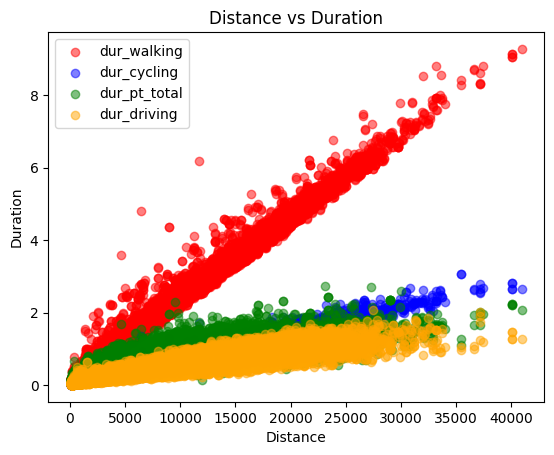

In [ ]:
import matplotlib.pyplot as plt
cols = ['dur_walking', 'dur_cycling', 'dur_pt_total', 'dur_driving']
plt.scatter(dur_df.distance, dur_df.dur_walking, color='red', alpha=0.5)
plt.scatter(dur_df.distance, dur_df.dur_cycling, color='blue', alpha=0.5)
plt.scatter(dur_df.distance, dur_df.dur_pt_total, color='green', alpha=0.5)
plt.scatter(dur_df.distance, dur_df.dur_driving, color='orange', alpha=0.5)
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.title('Distance vs Duration')
plt.legend(cols)
plt.show()

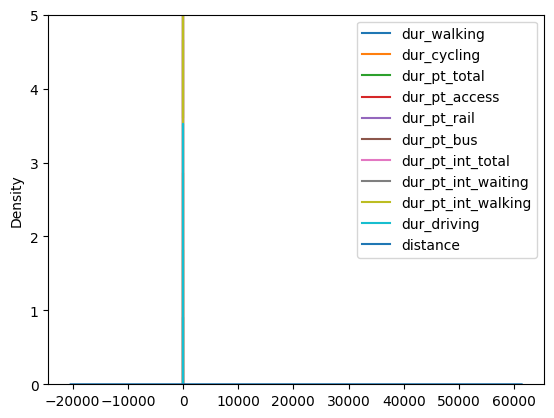

In [39]:
dur_df.plot.density()
plt.ylim(0, 5)
plt.show()